In [14]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, Activation, Cropping2D, Flatten, Convolution1D, Convolution2D, MaxPooling1D, MaxPooling2D
from tensorflow.keras.layers import SpatialDropout2D, Lambda, Input, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [2]:
from tensorflow import keras
model = keras.models.load_model("C:/Users/tristan/pretrained.h5")

In [5]:
np.round(model.predict(np.zeros((1, 32,32,1)))).astype(int)

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [17]:
with np.load("C:/Users/tristan/tag_samples.npz") as npz:
    samples = npz["samples"]

In [15]:
import glob
input_shape = (32,32)
real = np.array([255 - cv.resize(cv.imread(f)[...,0], dsize=input_shape[:2]) for f in glob.glob("C:/Users/tristan/tag_images/*.png")])
idxs = np.arange(len(real))
np.random.shuffle(idxs)
idxs = idxs[:120]
real.shape

(2543, 32, 32)

[ 70  70 114  67  13  64  70  70  33  70 114 114  38 107  70  70  70 114
 114  57 114  70  55  70  57  70 114  70  70 114  57  33 114 114 114   8
 114 107 114  70  87  70  70  70  70  70  70 114  10  70  70  67  70  70
  33  70  70 107 107  13  70  70  22   8   4  70  59  70  43  70  70  59
  11 107 114  13  33  70  70  46  96  64 114  70   8  70  28  79  59 114
  97  70  30 114  67  23  46  75  70  70  70 114  70 114  95  57 114  13
 114  70 114  13  57  70 114  70  97  63  70  11]
(120, 2)


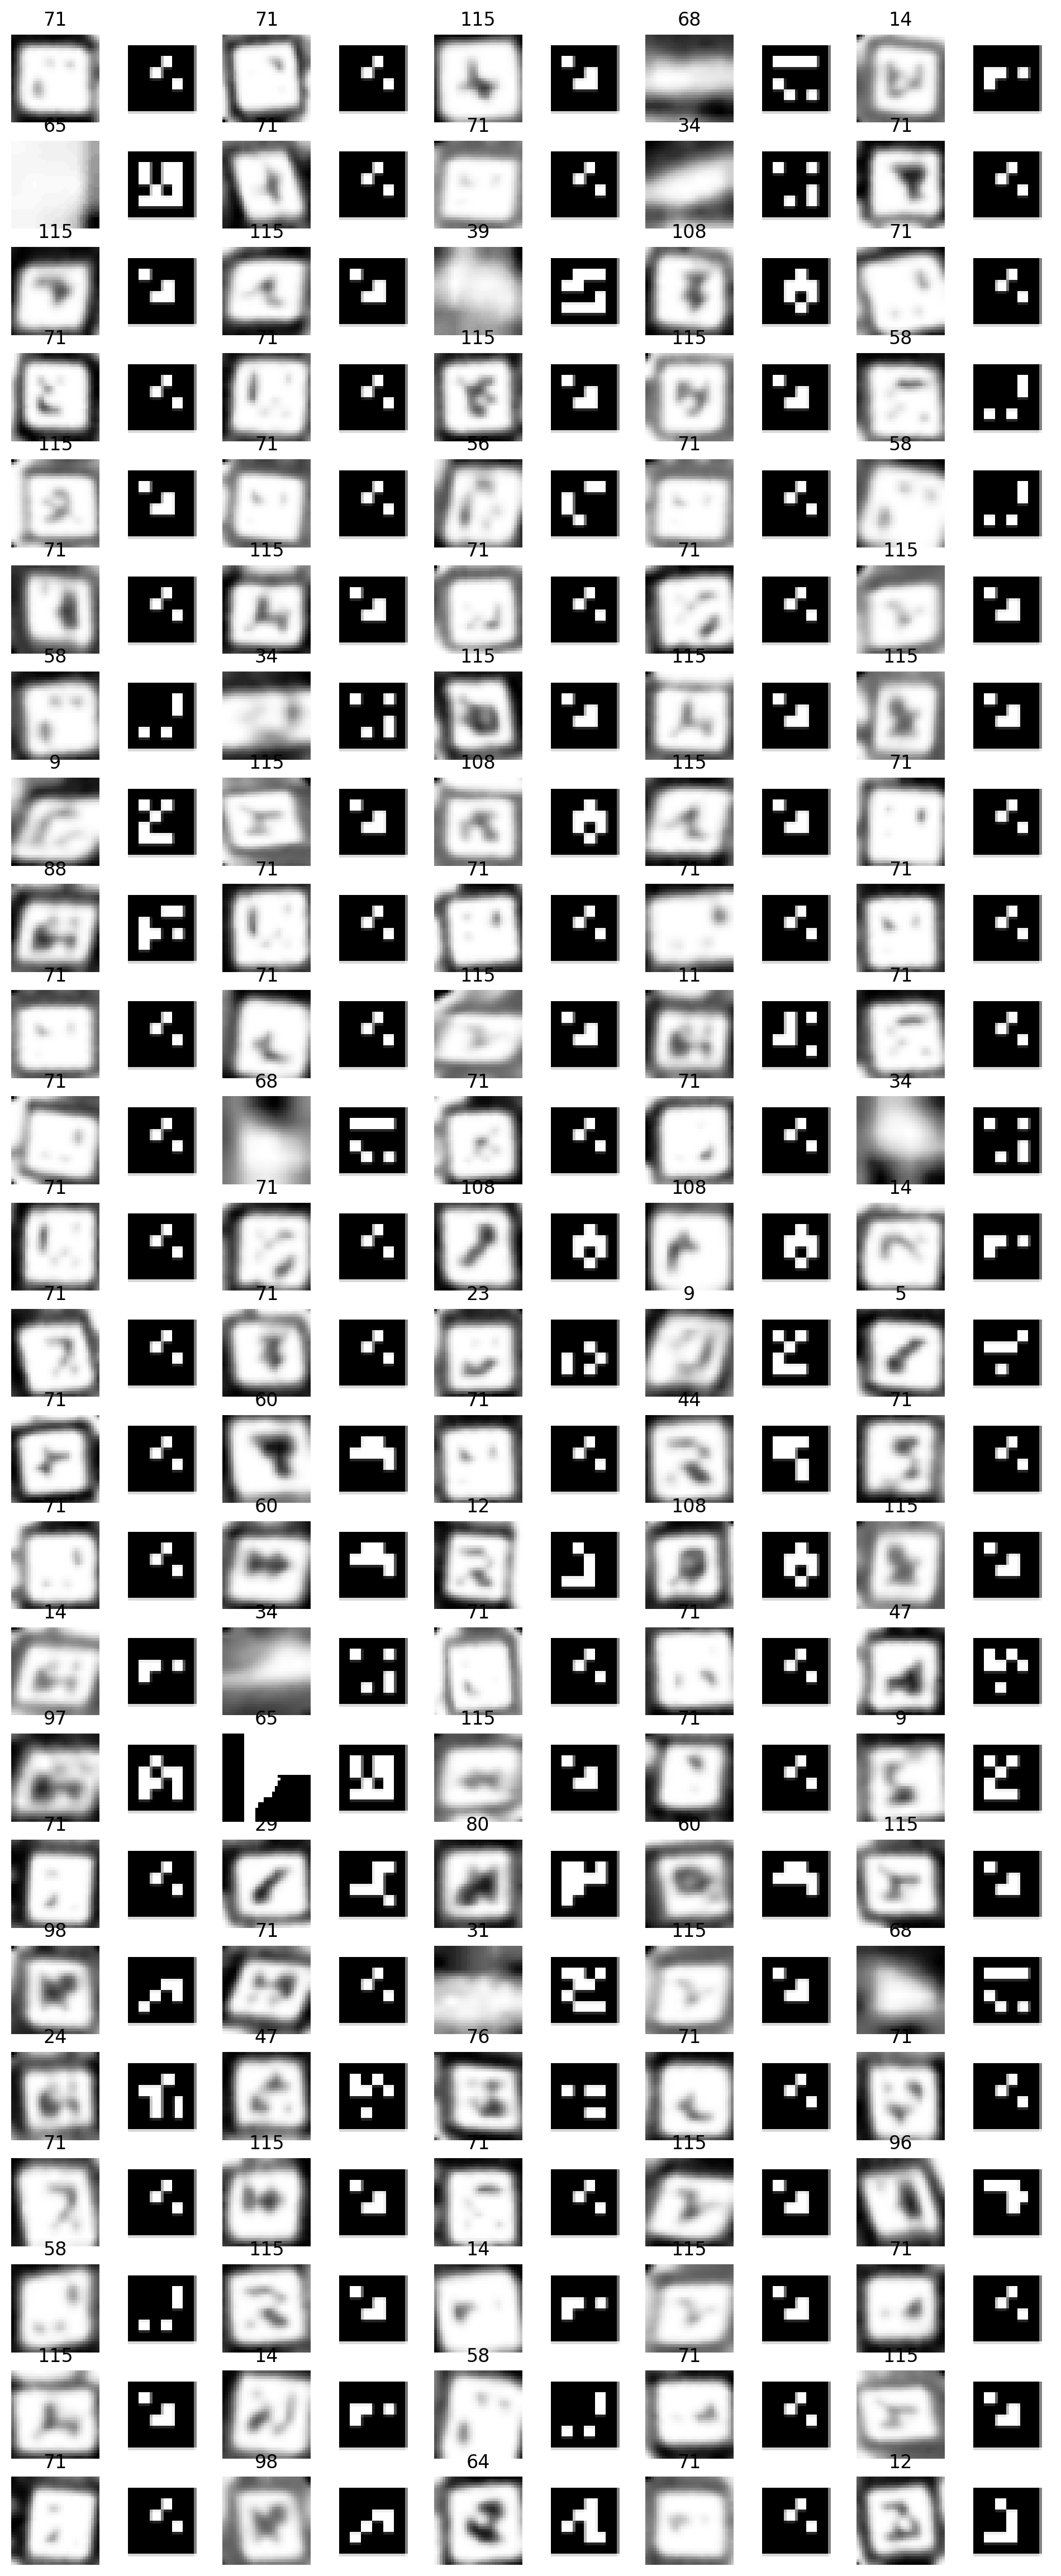

In [18]:
_y = np.argmax(model.predict(real[idxs]), axis=-1)
print(_y)

f, axes = plt.subplots(len(real[idxs]) // 10 * 2, 10, figsize=(len(real[idxs]) // 10, 10 * 3), dpi=200)
print(axes.flatten().reshape((-1, 2)).shape)
for i, y, (tag, opp), (ax, bx) in zip(range(len(axes.flatten()) // 2), _y, zip(real[idxs], samples[_y]), axes.flatten().reshape((-1, 2))):
    ax.set_title(str(y+1))
    ax.imshow(tag, cmap='Greys')
    bx.imshow(opp, cmap='Greys')
    ax.axis('off')
    bx.axis('off')
plt.show()